In [1]:
import numpy as np

In [10]:
data = np.loadtxt("kmeans_data.txt")

# Assuming the first column is X and the second column is Y
X1 = data[:, 0].reshape(-1,1 )
X2 = data[:, 1].reshape(-1,1 )

In [11]:
X2.shape

(1012, 1)

In [13]:
X = np.concatenate((X1,X2),axis = 1)

X.shape

(1012, 2)

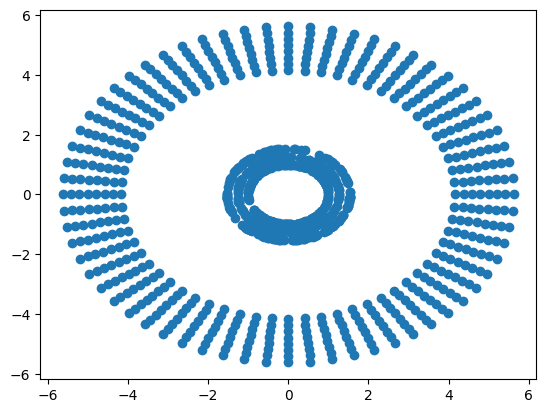

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],y=X[:,1])

## (1) Hand-crafted Features

Tranformation: using the distance from origin as a single feature


In [17]:
N = X.shape[0]

origin = np.array([0,0])

new_ft = np.zeros((N,))

for i in range(N):
    distance = np.linalg.norm(X[i] - origin)

    new_ft[i] = distance

In [18]:
new_ft.shape

(1012,)

In [70]:
def k_means(X):
    iterations = 200
    K = 2
    # initialize

    centroids = np.array([X[0],X[1]]).reshape((K,))
    distances = np.zeros((K,))
    labels = np.zeros((len(X)))
    for i in range(iterations):
        for x in range(len(X)):
            distances[0] = np.linalg.norm(X[x] - centroids[0])
            distances[1] = np.linalg.norm(X[x] - centroids[1])

            labels[x] = np.argmin(distances)

        for k in range(K):

            indices = np.where(labels == k)

            cluster_mean = np.mean(X[indices], axis=0)

            centroids[k] = cluster_mean


    return labels

In [44]:
new_ft[3]

4.7916666842090825

In [50]:
labels = k_means(new_ft)
labels.shape

(1012,)

In [48]:
labels

array([0., 0., 0., ..., 0., 0., 1.])

Text(0.5, 1.0, 'Clustering with Hand-crafted features')

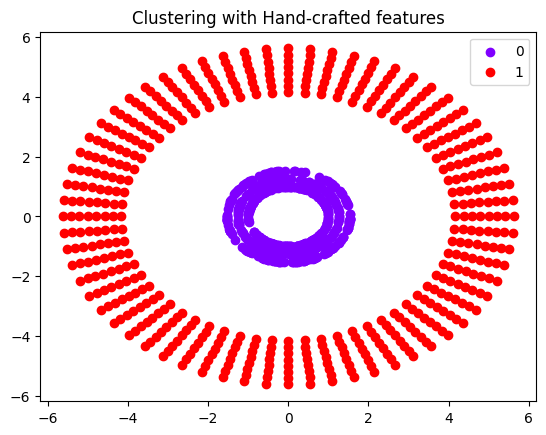

In [51]:
unique_labels = np.array([0,1])
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = (labels == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=[colors[i]], label=f'{label}')

plt.legend(loc='best')
plt.title('Clustering with Hand-crafted features')

## (2) Using kernalized features

In [53]:
# creating the landmark points

L = 1

index = np.random.choice(range(X.shape[0]), size=L, replace=False)
landmarks = X[index]
landmarks.shape

(1, 2)

In [55]:
X.shape

(1012, 2)

In [65]:
landmarks[0]

array([ 4.4096063, -2.3569837])

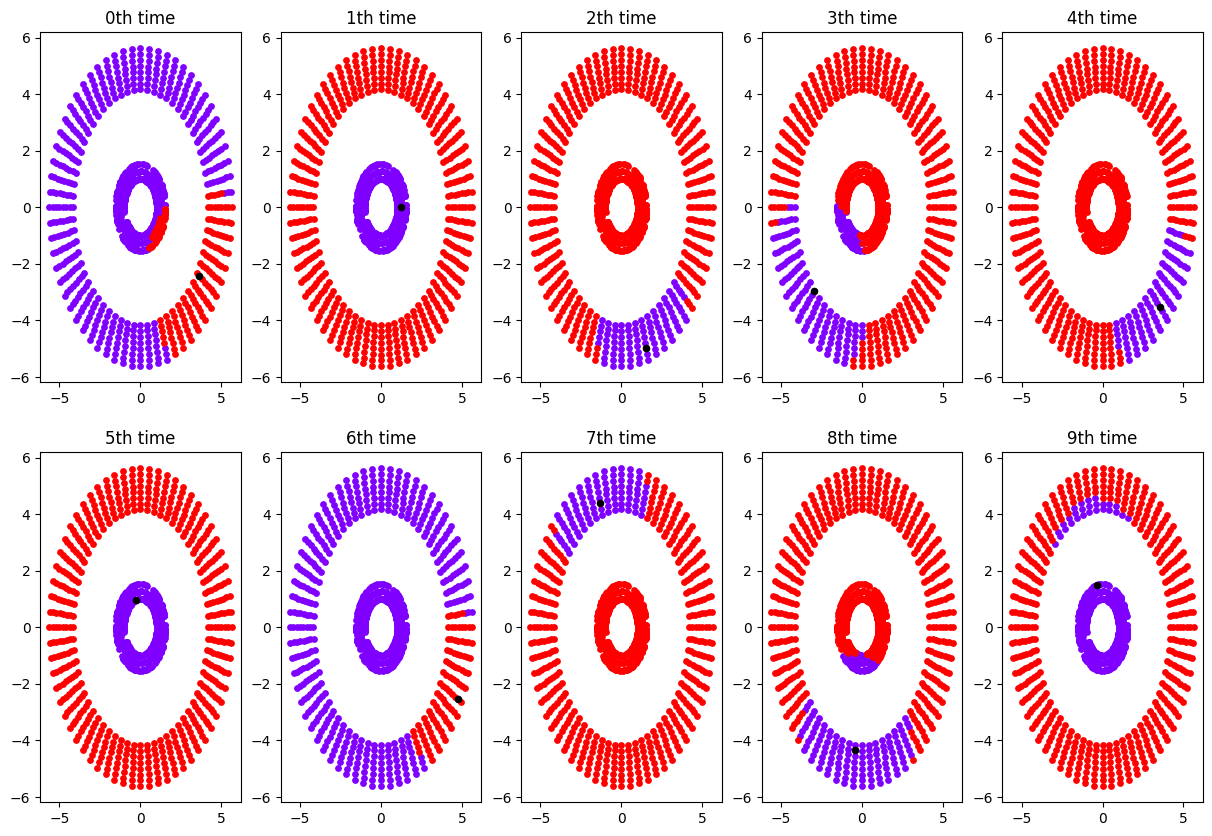

In [72]:
fig = plt.figure(figsize=(15,10))
for _ in range(10):

    # creating the landmark points

    L = 1

    index = np.random.choice(range(X.shape[0]), size=L, replace=False)
    landmarks = X[index]

    # making the kernelized features using these landmarks

    gamma = 0.1

    kernel_x = np.zeros((N,L))

    for i in range(N):
    
        distance = np.linalg.norm(X[i]-landmarks[0])

        kernel_x[i,0] = np.exp(-gamma * distance**2)

    labels = k_means(kernel_x)

    unique_labels = np.array([0,1])
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    plt.subplot(2,5,_+1)
    for i, label in enumerate(unique_labels):
        mask = (labels == label)
        plt.scatter(X[mask, 0], X[mask, 1], c=[colors[i]], label=f'{label}',s = 15)
    plt.scatter(landmarks[0][0],landmarks[0][1],label="Landmark",s = 20,c='black')
    # plt.legend(loc='best')
    plt.title(f"{_}th time")
    # plt.show()